In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
#pip install graphviz

In [3]:
#pip install imblearn


In [4]:
df= pd.read_csv('Sentiment_Analysis_Data.csv')

In [5]:
df.head()

,Unnamed: 0,Index,Title,Author,ID,Created,Original_Title,Without_stopwords,Lemmatized_Words,Pos_tags,...,PCA1,PCA2,For_Cluster_Seven,For_Cluster_Ten,neg,neu,pos,compound,Sentiment,Sentiment_Label
0,0,0,"['apple', 'vision', 'pro', 'has', 'ruined', 'm...",Old_Possible8977,1an21fb,2024-02-09 23:34:09,Apple Vision Pro has ruined movies for me,"['apple', 'vision', 'pro', 'ruined', 'movies']","['apple', 'vision', 'pro', 'ruined', 'movies']","[('[', 'JJ'), (""'apple"", 'NNP'), (""'"", 'POS'),...",...,0.369651,0.018061,0,1,0.279,0.541,0.18,-0.2732,-1,negative
1,1,1,"['its', 'too', 'expensive', 'no', 'regrets']",McNerdsAlot,1akdyzo,2024-02-06 16:35:52,It’s too expensive. No regrets.,"['expensive', 'regrets']","['expensive', 'regrets']","[('[', 'RB'), (""'expensive"", 'JJ'), (""'"", ""''""...",...,-0.054405,-0.046932,1,5,0.610,0.390,0.00,-0.5719,-1,negative
2,2,2,"['how', 'to', 'ruin', 'your', 'movie', 'library']",Mequbbal_Trader,1atvcqx,2024-02-18 14:31:17,How to ruin your movie library,"['ruin', 'movie', 'library']","['ruin', 'movie', 'library']","[('[', 'JJ'), (""'ruin"", 'NNP'), (""'"", 'POS'), ...",...,-0.068477,-0.067856,1,5,0.432,0.568,0.00,-0.5859,-1,negative
3,3,3,"['i', 'was', 'really', 'wrong', 'about', 'the'...",AppleBottmBeans,1amtycf,2024-02-09 17:45:25,I was REALLY wrong about the AVP. This is the ...,"['really', 'wrong', 'avp', 'incredible', 'piec...","['really', 'wrong', 'avp', 'incredible', 'piec...","[('[', 'RB'), (""'really"", 'RB'), (""'"", ""''""), ...",...,-0.113431,0.092884,4,9,0.205,0.795,0.00,-0.6281,-1,negative
4,4,4,"['apple', 'vision', 'pro', 'is', 'the', 'best'...",Deathtosnoopy,1b2jq3m,2024-02-28 22:35:12,Apple vision pro is the best thing to happen t...,"['apple', 'vision', 'pro', 'best', 'thing', 'h...","['apple', 'vision', 'pro', 'best', 'thing', 'h...","[('[', 'JJ'), (""'apple"", 'NNP'), (""'"", 'POS'),...",...,0.209062,-0.007999,0,1,0.000,0.640,0.36,0.7351,1,positive


In [6]:
# Split the data into features (X) and labels (y)
X = df['Lemmatized_Words']
y = df['Sentiment_Label']

In [7]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
X_train.to_csv('Training_Data_DT.csv')

In [9]:
X_test.to_csv('Test_Data_DT.csv')

In [10]:
# Vectorize the text data
vectorizer = CountVectorizer()
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)

In [11]:
# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_counts, y_train)

In [12]:
# Train the decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier(random_state=42)

In [13]:
y_pred = clf.predict(X_test_counts)

In [14]:
# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.575


In [15]:
# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred, pos_label='positive')
print("Precision:", precision)

Precision: 0.9298245614035088


In [16]:
recall = recall_score(y_test, y_pred, pos_label='positive')
print("Recall:", recall)



Recall: 0.5792349726775956


In [17]:
f1 = f1_score(y_test, y_pred, pos_label='positive')
print("F1 Score:", f1)



F1 Score: 0.7138047138047138


In [18]:
# Example of predicting sentiment of a new text
new_text = "I hated the Apple Vision Pro"
print("New Comment: ",new_text)
new_text_processed = " ".join(new_text.split())  # Remove extra spaces if any
new_text_counts = vectorizer.transform([new_text_processed])
predicted_sentiment = clf.predict(new_text_counts)[0]
print("Predicted Sentiment:", predicted_sentiment)

New Comment:  I hated the Apple Vision Pro
Predicted Sentiment: negative


In [19]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)



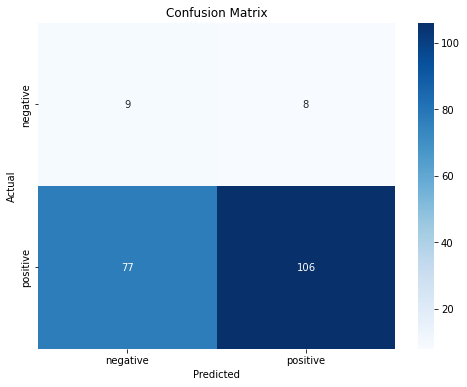

In [20]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['negative', 'positive'], yticklabels=['negative', 'positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [21]:
from sklearn import tree
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_1581 <= 0.50
|   |--- feature_104 <= 0.50
|   |   |--- feature_1365 <= 0.50
|   |   |   |--- feature_76 <= 0.50
|   |   |   |   |--- feature_62 <= 0.50
|   |   |   |   |   |--- feature_1610 <= 0.50
|   |   |   |   |   |   |--- feature_537 <= 0.50
|   |   |   |   |   |   |   |--- feature_833 <= 0.50
|   |   |   |   |   |   |   |   |--- feature_1583 <= 0.50
|   |   |   |   |   |   |   |   |   |--- feature_1567 <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- feature_1403 <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 220
|   |   |   |   |   |   |   |   |   |   |--- feature_1403 >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: positive
|   |   |   |   |   |   |   |   |   |--- feature_1567 >  0.50
|   |   |   |   |   |   |   |   |   |   |--- class: positive
|   |   |   |   |   |   |   |   |--- feature_1583 >  0.50
|   |   |   |   |   |   |   |   |   |--- class: positive
|   |   |   |   |   |   |   |--- feature_833 >  0.50


In [22]:
with open("decistion_tree.log", "w") as fout:
    fout.write(text_representation)

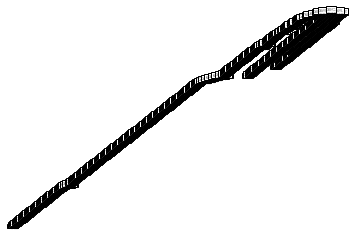

In [25]:
tree.plot_tree(clf)
plt.show()

In [46]:
cn=list(clf.classes_)

In [47]:
type(cn)

list

In [48]:
vectorizer.get_feature_names_out()

array(['able', 'abroad', 'absolutely', ..., 'zoom', 'zoomdoes', 'zwift'],
      dtype=object)

In [49]:
fn = list(vectorizer.get_feature_names_out())

In [50]:
type(fn)

list

In [61]:
len(fn)

1694

In [62]:
trimmed_fn = fn[0:100]

In [63]:
trimmed_fn

['able',
 'abroad',
 'absolutely',
 'access',
 'accessibility',
 'accessories',
 'accident',
 'accidental',
 'accidentallyish',
 'account',
 'accounts',
 'accuracy',
 'across',
 'activated',
 'actual',
 'actually',
 'adam',
 'add',
 'added',
 'addicted',
 'addiction',
 'additions',
 'adobe',
 'adopter',
 'adoption',
 'adults',
 'advice',
 'ai',
 'air',
 'airlauncher',
 'airplane',
 'airplay',
 'airpod',
 'airpods',
 'albums',
 'allow',
 'almost',
 'along',
 'already',
 'also',
 'alternatives',
 'although',
 'alvr',
 'always',
 'alyx',
 'amazed',
 'amazing',
 'amazon',
 'analysis',
 'angles',
 'anime',
 'announced',
 'announcements',
 'announcing',
 'answer',
 'anticipatory',
 'anxiety',
 'anybody',
 'anymore',
 'anyone',
 'anything',
 'anywhere',
 'app',
 'appealing',
 'appgame',
 'apple',
 'applecare',
 'apples',
 'appletv',
 'applevision',
 'applevisionpro',
 'applications',
 'applied',
 'appointment',
 'appropriate',
 'approval',
 'apps',
 'apv',
 'ar',
 'arc',
 'arch',
 'architectu

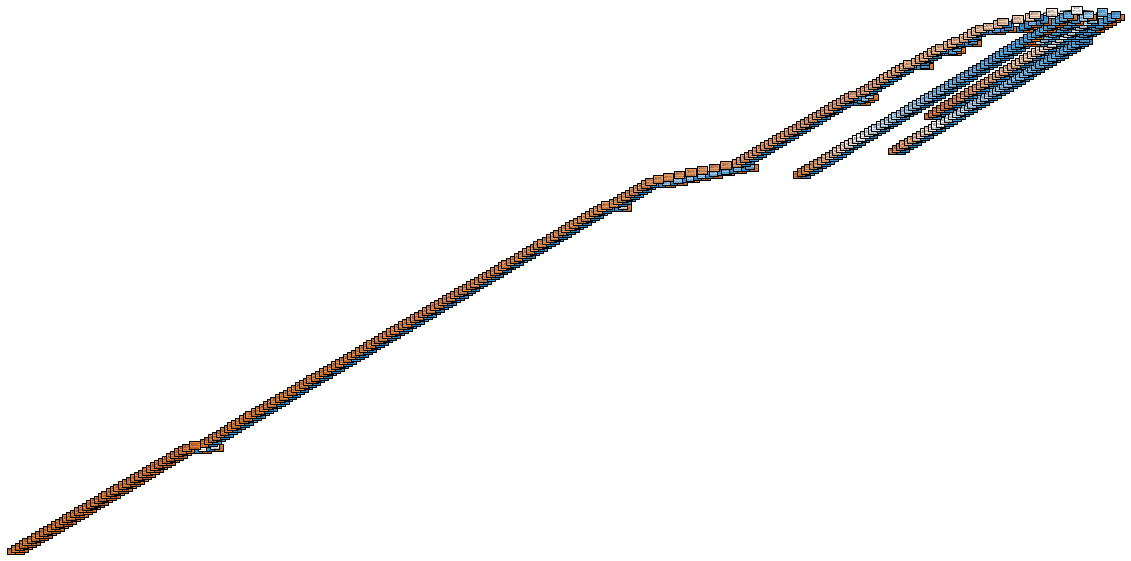

In [65]:
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=fn, class_names=cn)
plt.savefig('decision_tree_big_1.png')
plt.show()

IndexError: list index out of range

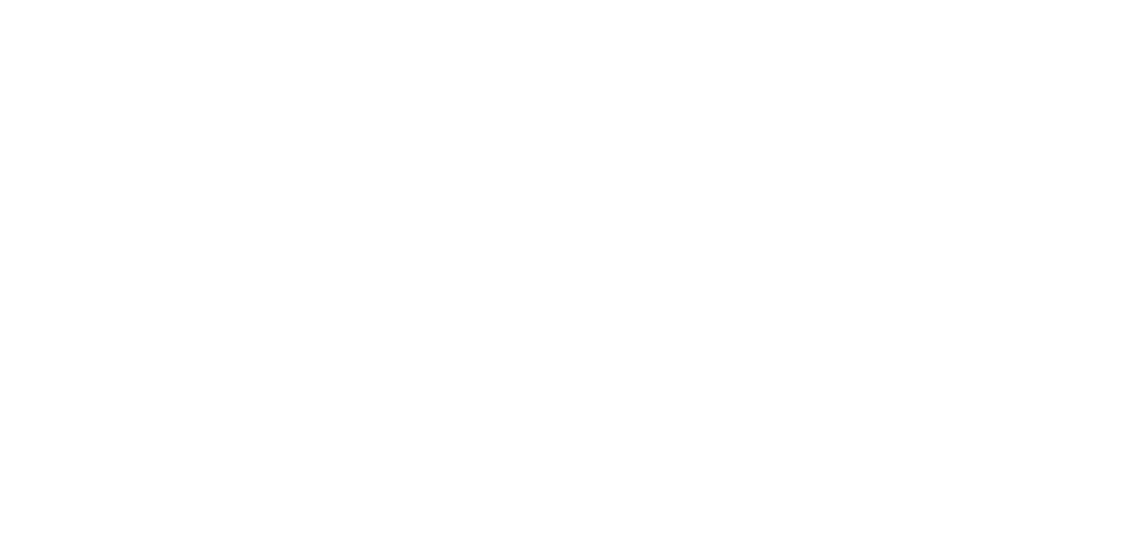

In [64]:
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=trimmed_fn, class_names=cn)
#plt.savefig('decision_tree_big.png')
plt.show()

from sklearn.tree import export_graphviz
import graphviz
# DOT data
dot_data = export_graphviz(clf, out_file=None, 
                           feature_names=vectorizer.get_feature_names_out(),
                           class_names=['negative', 'positive'],
                           filled=True, rounded=True,
                           special_characters=True)

# Visualize the decision tree
graph = graphviz.Source(dot_data)
graph.render("decision_tree")

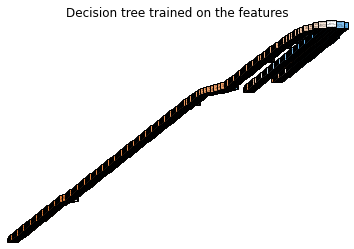

In [27]:
from sklearn.tree import plot_tree

plt.figure()
clf = DecisionTreeClassifier().fit(X_train_resampled, y_train_resampled)
plot_tree(clf, filled=True)
plt.title("Decision tree trained on the features")
plt.show()

#X = df['Lemmatized_Words']
#y = df['Sentiment_Label']